## Predicting the quality of red wine

This notebook uses data on the attributes of red wine to estimate their quality with several machine learning approaches.

Data: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

We begin with an exploratory data analysis followed by a random forest classifier, stochastic gradient descent classifier and a support vector classifier for quality estimation.

Install and import packages:

In [1]:
%pip install pandas seaborn matplotlib sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=6036c6f76e06a17d9219468bfa7d88645aa6996bef5b39608afd31cf30342a56
  Stored in directory: c:\users\blubb\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [3]:
#Loading dataset
wine = pd.read_csv('winequality-red.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Data Exploration

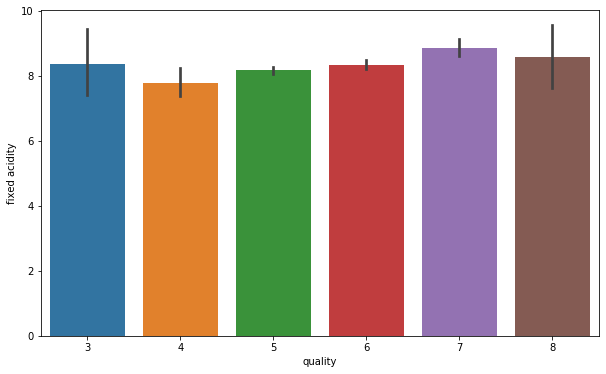

In [7]:
# We see no linear relation between fixed acidity and quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

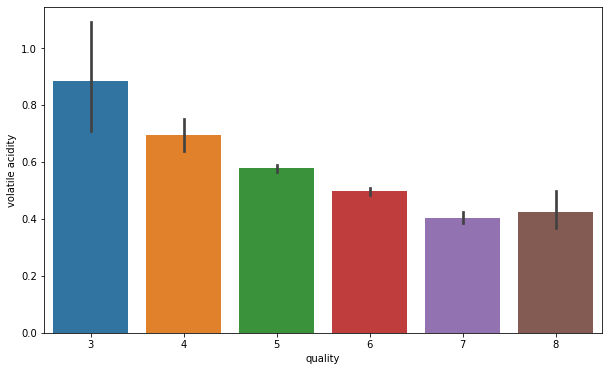

In [9]:
# We can see a strong negative bivariate influence of volatile acidity on quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

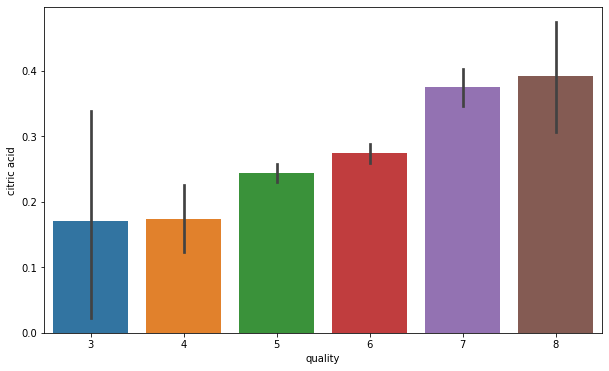

In [11]:
# While citric acid shows an opposing positive influence
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

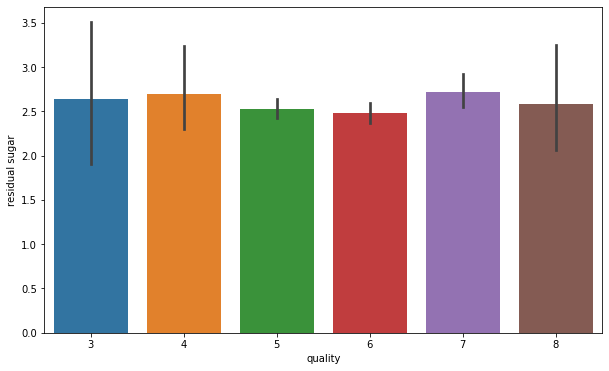

In [12]:
# Residual sugar has no clear influence again
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

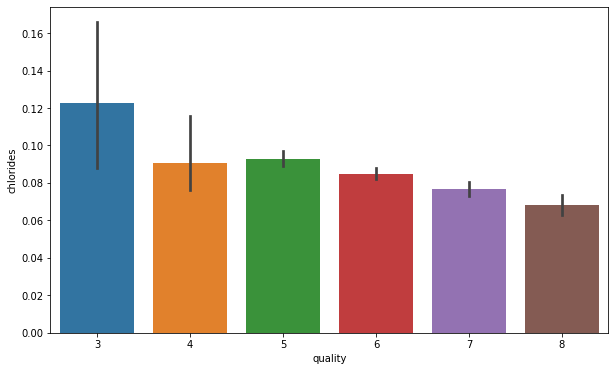

In [14]:
# High chlorides values are especially common in low quality wines
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

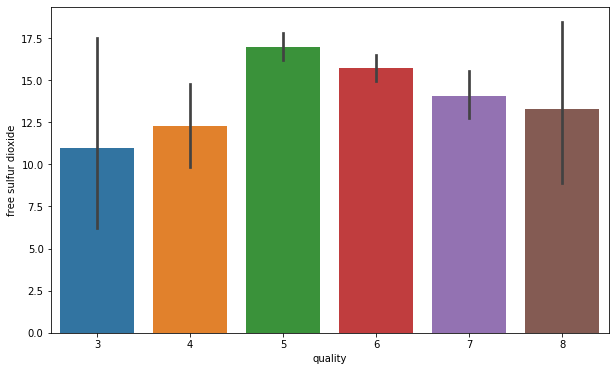

In [15]:
# Whereas free sulfur dioxide suggests a quadratic influence
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

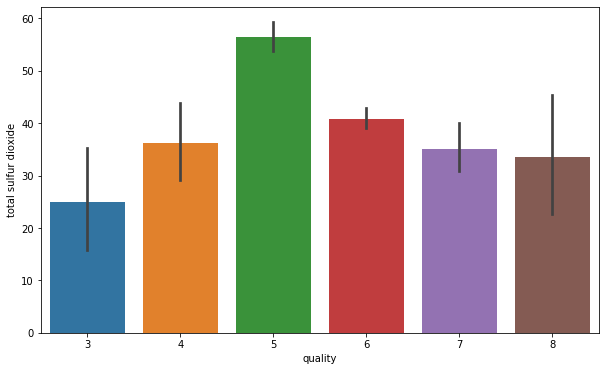

In [17]:
# Total sulfur dioxide shows similar effects
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

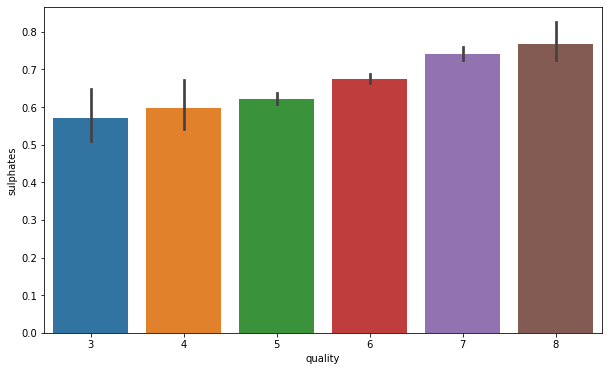

In [19]:
#Sulphate levels increase with quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

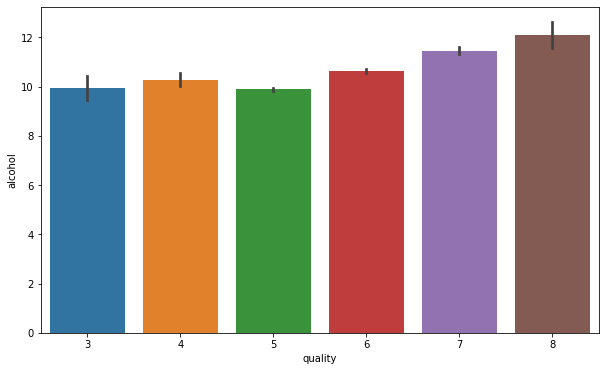

In [21]:
# While less important on the lower quality level, higher levels of alcohol do seem to be common in high quality wines
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

## Preprocessing Data for performing Machine learning algorithms

In [22]:
# Creating binary classificaion for the response variable.
# Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [23]:
# Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [24]:
# Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [25]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

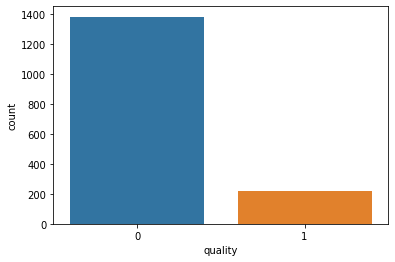

In [27]:
# Uneven sample with many more bad than good wines
sns.countplot(wine['quality'])

In [39]:
# Stupid classifier, which always guesses bad, would have an accuracy of 84%
print(1-217/1382)

0.8429811866859623


In [28]:
# Now seperate the dataset as response variable and feature variables
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [29]:
# Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [30]:
# Creating Standard scaling to get optimized result
sc = StandardScaler()

In [31]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Now to apply some ML algorithms

### Random Forest Classifier

In [32]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [33]:
# Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       278
           1       0.63      0.29      0.39        42

    accuracy                           0.88       320
   macro avg       0.77      0.63      0.66       320
weighted avg       0.87      0.88      0.86       320



In [40]:
print(confusion_matrix(y_test, pred_rfc))

[[271   7]
 [ 30  12]]


### Random forest gives an accuracy of 88%

In [ ]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))



## Stochastic Gradient Decent Classifier

In [34]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [35]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       278
           1       0.36      0.12      0.18        42

    accuracy                           0.86       320
   macro avg       0.62      0.54      0.55       320
weighted avg       0.81      0.86      0.82       320



### 86% accuracy using stochastic gradient descent classifier, but notably lower precision and recall for good wines

In [36]:
print(confusion_matrix(y_test, pred_sgd))

[[269   9]
 [ 37   5]]


## Support Vector Classifier

In [41]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [42]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       278
           1       0.63      0.29      0.39        42

    accuracy                           0.88       320
   macro avg       0.77      0.63      0.66       320
weighted avg       0.87      0.88      0.86       320



#### Support vector classifier gets an accuracy of 88% and same precision and recall as random forest classifier

## Let's try to increase our accuracy of models
## Grid Search CV

In [46]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [47]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [48]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 1, 'kernel': 'rbf'}

In [49]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       278
           1       0.70      0.33      0.45        42

    accuracy                           0.89       320
   macro avg       0.80      0.66      0.70       320
weighted avg       0.88      0.89      0.88       320



### SVC accuracy improves from 86% to 91% using Grid Search CV

## Cross Validation Score for random forest and SGD

In [50]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9100947342519685

### Random forest accuracy increases from 87% to 91 % using cross validation score

## Using machine learning algorithms we could increase prediction accuracy by 7% compared to a stupid classifier